In [6]:
# import os
from fastbook import *
from fastai.vision.widgets import *

In [12]:
# path = Path()
# path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [31]:
# Load updated trained model to 'learn_inf' variable
learn_inf = load_learner('export.pkl')

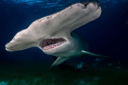

In [35]:
# # Set API key
# key = os.environ.get('AZURE_SEARCH_KEY')

# # Get images for hammerhead sharks
# hammerheads = search_images_bing(key, 'hammerhead shark')
# ims = hammerheads.attrgot('contentUrl')

# # Save first image to test folder
# dest = 'test_img/hammerhead.jpg'
# download_url(ims[1], dest)

# # Show image as output
# im = Image.open(dest)
# im.to_thumb(128,128)

In [36]:
# # Predict type of shark in the image
# learn_inf.predict('test_img/hammerhead.jpg')

('hammerhead', TensorBase(1), TensorBase([3.9888e-04, 9.9944e-01, 1.6380e-04]))

In [38]:
# # Show index of each type of shark
# learn_inf.dls.vocab

['great white', 'hammerhead', 'tiger']

In [39]:
# # Set variable for upload button
btn_upload = widgets.FileUpload()
# btn_upload

FileUpload(value={}, description='Upload')

In [40]:
# # Set test image to the upload button (same as usng the button to upload the image)
# btn_upload = SimpleNamespace(data = ['test_img/hammerhead.jpg'])

# # Create the image
# img = PILImage.create(btn_upload.data[-1])

In [41]:
# # Use ouput widget to show the image
out_pl = widgets.Output()
# out_pl.clear_output()
# with out_pl: display(img.to_thumb(128,128))
# out_pl

Output()

In [42]:
# # Get predictions for the selected image
# pred,pred_idx,probs = learn_inf.predict(img)

In [45]:
# Use label for each prediction variable
lbl_pred = widgets.Label()
# lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
# lbl_pred

Label(value='Prediction: hammerhead; Probability: 0.9994')

In [46]:
# Button used to perform the classification of image
btn_run = widgets.Button(description='Classify')
# btn_run

Button(description='Classify', style=ButtonStyle())

In [47]:
# Put everything together in an action to perform when clicking the classification button
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

# Tell the button to run function above when clicked
btn_run.on_click(on_click_classify)

In [48]:
# # Reset upload button
# btn_upload = widgets.FileUpload()

In [49]:
# Put everything together on a VBox object
VBox([widgets.Label('Select your shark!'), 
      btn_upload, btn_run, out_pl, lbl_pred])